In [ ]:
!pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download paramaggarwal/fashion-product-images-small

 99% 560M/565M [00:03<00:00, 234MB/s]
100% 565M/565M [00:03<00:00, 184MB/s]


In [ ]:
!pip install patool

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.3 MB/s eta 0:00:00


In [ ]:
import patoolib
patoolib.extract_archive("/content/fashion-product-images-small.zip",outdir="/content")

patool: Extracting /content/fashion-product-images-small.zip ...
patool: running /usr/bin/7z x -o/content -- /content/fashion-product-images-small.zip
patool: ... /content/fashion-product-images-small.zip extracted to `/content'.


'/content'

In [ ]:
!pip install tensorflow -U keras -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 93.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 87.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 46.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [ ]:
import tensorflow as tf
if tf.test.gpu_device_name():
  print(tf.test.gpu_device_name())
else:
  print(None)

/device:GPU:0


In [ ]:
from tensorflow import keras
from keras.preprocessing import image
from keras.layers import GlobalMaxPooling2D
from keras.applications.resnet50 import ResNet50, preprocess_input

In [ ]:
model= ResNet50(weights="imagenet", include_top=False, input_shape=(224,224,3))
model.trainable=False
model=keras.Sequential(layers=model)
model.add(GlobalMaxPooling2D())
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
img=image.load_img("/content/ShopIQ.jpg", target_size=(224,224))

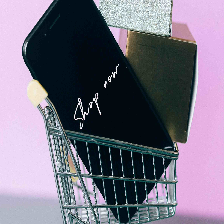

In [ ]:
img

In [ ]:
img_array=image.img_to_array(img)
img_array.shape

(224, 224, 3)

In [ ]:
import numpy as np
expanded_img=np.expand_dims(img_array,axis=0)
print(expanded_img.shape)
print(expanded_img)

(1, 224, 224, 3)
[[[[119.32       96.221     143.061    ]
   [115.32       92.221     139.061    ]
   [119.32       96.221     143.061    ]
   ...
   [109.32       77.221     135.061    ]
   [109.32       77.221     135.061    ]
   [109.32       77.221     135.061    ]]

  [[119.32       96.221     143.061    ]
   [119.32       96.221     143.061    ]
   [115.32       92.221     139.061    ]
   ...
   [109.32       77.221     135.061    ]
   [109.32       77.221     135.061    ]
   [106.32       74.221     132.061    ]]

  [[114.32       91.221     138.061    ]
   [119.32       96.221     143.061    ]
   [119.32       96.221     143.061    ]
   ...
   [107.32       75.221     133.061    ]
   [109.32       77.221     135.061    ]
   [109.32       77.221     135.061    ]]

  ...

  [[ 56.32       69.221      96.061    ]
   [ 54.32       67.221      94.061    ]
   [ 54.32       67.221      94.061    ]
   ...
   [ 25.32        2.2210007  49.060997 ]
   [ 25.32        2.2210007  49.060997 ]

In [ ]:
preprocessed_img= preprocess_input(expanded_img)
print(preprocessed_img.shape)
print(preprocessed_img)

(1, 224, 224, 3)
[[[[143.061      96.221     119.32     ]
   [139.061      92.221     115.32     ]
   [143.061      96.221     119.32     ]
   ...
   [135.061      77.221     109.32     ]
   [135.061      77.221     109.32     ]
   [135.061      77.221     109.32     ]]

  [[143.061      96.221     119.32     ]
   [143.061      96.221     119.32     ]
   [139.061      92.221     115.32     ]
   ...
   [135.061      77.221     109.32     ]
   [135.061      77.221     109.32     ]
   [132.061      74.221     106.32     ]]

  [[138.061      91.221     114.32     ]
   [143.061      96.221     119.32     ]
   [143.061      96.221     119.32     ]
   ...
   [133.061      75.221     107.32     ]
   [135.061      77.221     109.32     ]
   [135.061      77.221     109.32     ]]

  ...

  [[ 96.061      69.221      56.32     ]
   [ 94.061      67.221      54.32     ]
   [ 94.061      67.221      54.32     ]
   ...
   [ 49.060997    2.2210007  25.32     ]
   [ 49.060997    2.2210007  25.32     ]

In [ ]:
model.predict(preprocessed_img)

1/1 [==============================] - 9s 9s/step


array([[12.008783 , 12.72236  ,  0.       , ...,  1.7037628,  4.954564 ,
        10.254121 ]], dtype=float32)

In [ ]:
model.predict(preprocessed_img).shape

1/1 [==============================] - 0s 23ms/step


(1, 2048)

In [ ]:
model.predict(preprocessed_img).flatten().shape

1/1 [==============================] - 0s 37ms/step


(2048,)

In [ ]:
from numpy.linalg import norm
normalized_img_array=model.predict(preprocessed_img).flatten()/norm(model.predict(preprocessed_img).flatten())
normalized_img_array

1/1 [==============================] - 0s 34ms/step


array([0.03429984, 0.03633798, 0.        , ..., 0.00486634, 0.01415137,
       0.02928812], dtype=float32)

In [ ]:
def embeddings(image_path,model):
  img=image.load_img(image_path,target_size=(224,224))
  img_array=image.img_to_array(img)
  expanded_img=np.expand_dims(img_array,axis=0)
  preprocessed_img= preprocess_input(expanded_img)
  embed=model.predict(preprocessed_img)
  normalized_embeddings=embed.flatten()/norm(embed.flatten())
  return normalized_embeddings

In [ ]:
import os
image_paths=[]
for imgs in os.listdir('images'):
  image_paths.append(os.path.join('images',imgs))

In [ ]:
print(len(image_paths))
print(image_paths[0:3])

44441
['images/43716.jpg', 'images/36996.jpg', 'images/7142.jpg']


In [ ]:
embeddings_list=[]
for imgs_path in image_paths:
  embeddings_list.append(embeddings(imgs_path,model))

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 25s 25s/step


KeyboardInterrupt: ignored

In [ ]:
len(embeddings_list)

27876

In [ ]:
import pickle

In [ ]:
pickle.dump(embeddings_list,open('embeddings.pkl','wb'))


In [ ]:
pickle.dump(image_paths,open('image_paths.pkl','wb'))

In [ ]:
len(image_paths)

44441

In [ ]:
from tqdm import tqdm
cont_embeddings_list=[]
for imgs_path in tqdm(image_paths[27876:]):
  cont_embeddings_list.append(embeddings(imgs_path,model))

  0%|          | 0/16565 [00:00<?, ?it/s]

1/1 [==============================] - 0s 455ms/step


  0%|          | 1/16565 [00:01<6:14:59,  1.36s/it]

1/1 [==============================] - 0s 24ms/step


  0%|          | 3/16565 [00:01<1:54:09,  2.42it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 5/16565 [00:01<1:07:25,  4.09it/s]

1/1 [==============================] - 0s 31ms/step


  0%|          | 7/16565 [00:01<49:00,  5.63it/s]  

1/1 [==============================] - 0s 25ms/step


  0%|          | 9/16565 [00:02<39:37,  6.96it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 11/16565 [00:02<32:49,  8.41it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 13/16565 [00:02<28:37,  9.63it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 15/16565 [00:02<25:36, 10.77it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 17/16565 [00:02<24:07, 11.43it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 19/16565 [00:02<22:40, 12.16it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 21/16565 [00:02<21:53, 12.59it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 23/16565 [00:03<21:34, 12.78it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 25/16565 [00:03<21:39, 12.73it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 27/16565 [00:03<20:55, 13.18it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 29/16565 [00:03<20:01, 13.76it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 31/16565 [00:03<20:09, 13.67it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 33/16565 [00:03<21:00, 13.11it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 35/16565 [00:03<20:46, 13.27it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 37/16565 [00:04<20:24, 13.50it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 39/16565 [00:04<20:30, 13.43it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 41/16565 [00:04<20:32, 13.41it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 43/16565 [00:04<20:27, 13.46it/s]

1/1 [==============================] - 0s 22ms/step


  0%|          | 45/16565 [00:04<20:09, 13.66it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 47/16565 [00:04<19:29, 14.13it/s]

1/1 [==============================] - 0s 23ms/step


  0%|          | 49/16565 [00:04<19:57, 13.79it/s]

1/1 [==============================] - 0s 21ms/step


  0%|          | 51/16565 [00:05<20:10, 13.64it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 53/16565 [00:05<22:25, 12.27it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 55/16565 [00:05<24:26, 11.26it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 57/16565 [00:05<25:09, 10.94it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 59/16565 [00:05<25:07, 10.95it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 61/16565 [00:06<26:04, 10.55it/s]

1/1 [==============================] - 0s 33ms/step


  0%|          | 63/16565 [00:06<27:08, 10.14it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 65/16565 [00:06<27:12, 10.11it/s]

1/1 [==============================] - 0s 32ms/step


  0%|          | 67/16565 [00:06<26:46, 10.27it/s]

1/1 [==============================] - 0s 34ms/step


  0%|          | 69/16565 [00:06<26:30, 10.37it/s]

1/1 [==============================] - 0s 36ms/step


  0%|          | 71/16565 [00:07<26:48, 10.26it/s]

1/1 [==============================] - 0s 35ms/step


  0%|          | 71/16565 [00:21<26:48, 10.26it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 73/16565 [00:45<26:50:13,  5.86s/it]

1/1 [==============================] - 0s 30ms/step


  0%|          | 75/16565 [00:45<18:53:31,  4.12s/it]

1/1 [==============================] - 0s 28ms/step


  0%|          | 77/16565 [00:46<13:20:09,  2.91s/it]

1/1 [==============================] - 0s 28ms/step


  0%|          | 79/16565 [00:46<9:26:45,  2.06s/it] 

1/1 [==============================] - 0s 27ms/step


  0%|          | 81/16565 [00:46<6:43:57,  1.47s/it]

1/1 [==============================] - 0s 29ms/step


  1%|          | 83/16565 [00:46<4:49:43,  1.05s/it]

1/1 [==============================] - 0s 32ms/step


  1%|          | 85/16565 [00:46<3:29:08,  1.31it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 87/16565 [00:46<2:32:47,  1.80it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 89/16565 [00:47<1:53:33,  2.42it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 91/16565 [00:47<1:26:13,  3.18it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 93/16565 [00:47<1:06:57,  4.10it/s]

1/1 [==============================] - 0s 29ms/step


  1%|          | 95/16565 [00:47<53:01,  5.18it/s]  

1/1 [==============================] - 0s 27ms/step


  1%|          | 97/16565 [00:47<43:53,  6.25it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 99/16565 [00:47<38:07,  7.20it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 101/16565 [00:47<33:09,  8.27it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 103/16565 [00:48<30:14,  9.07it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 105/16565 [00:48<27:34,  9.95it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 107/16565 [00:48<25:40, 10.69it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 109/16565 [00:48<24:12, 11.33it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 111/16565 [00:48<25:22, 10.81it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 113/16565 [00:49<26:35, 10.31it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 115/16565 [00:49<26:34, 10.31it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 117/16565 [00:49<27:11, 10.08it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 119/16565 [00:49<26:51, 10.21it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 121/16565 [00:49<27:25, 10.00it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 123/16565 [00:50<27:46,  9.87it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 125/16565 [00:50<27:36,  9.92it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 127/16565 [00:50<27:11, 10.07it/s]

1/1 [==============================] - 0s 39ms/step


  1%|          | 129/16565 [00:50<27:08, 10.09it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 131/16565 [00:50<27:06, 10.11it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 133/16565 [00:51<27:10, 10.08it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 135/16565 [00:51<26:44, 10.24it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 137/16565 [00:51<27:08, 10.09it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 139/16565 [00:51<27:22, 10.00it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 141/16565 [00:51<27:09, 10.08it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 143/16565 [00:52<26:52, 10.19it/s]

1/1 [==============================] - 0s 38ms/step


  1%|          | 145/16565 [00:52<26:51, 10.19it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 147/16565 [00:52<26:52, 10.18it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 149/16565 [00:52<26:54, 10.17it/s]

1/1 [==============================] - 0s 34ms/step


  1%|          | 151/16565 [00:52<26:46, 10.22it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 153/16565 [00:53<27:38,  9.89it/s]

1/1 [==============================] - 0s 37ms/step


  1%|          | 154/16565 [00:53<27:41,  9.88it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 156/16565 [00:53<27:07, 10.09it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 158/16565 [00:53<27:03, 10.10it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 160/16565 [00:53<27:11, 10.06it/s]

1/1 [==============================] - 0s 42ms/step


  1%|          | 162/16565 [00:53<27:59,  9.77it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 163/16565 [00:54<28:12,  9.69it/s]

1/1 [==============================] - 0s 40ms/step


  1%|          | 165/16565 [00:54<27:46,  9.84it/s]

1/1 [==============================] - 0s 33ms/step


  1%|          | 167/16565 [00:54<27:24,  9.97it/s]

1/1 [==============================] - 0s 45ms/step


  1%|          | 169/16565 [00:54<27:31,  9.93it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 170/16565 [00:54<28:25,  9.61it/s]

1/1 [==============================] - 0s 36ms/step


  1%|          | 171/16565 [00:54<28:16,  9.66it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 173/16565 [00:55<25:49, 10.58it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 175/16565 [00:55<23:47, 11.48it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 177/16565 [00:55<22:21, 12.22it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 179/16565 [00:55<22:10, 12.32it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 181/16565 [00:55<21:19, 12.80it/s]

1/1 [==============================] - 0s 23ms/step


  1%|          | 183/16565 [00:55<21:25, 12.74it/s]

1/1 [==============================] - 0s 22ms/step


  1%|          | 185/16565 [00:55<20:56, 13.04it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 187/16565 [00:56<21:37, 12.62it/s]

1/1 [==============================] - 0s 26ms/step


  1%|          | 189/16565 [00:56<21:49, 12.50it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 191/16565 [00:56<22:01, 12.39it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 193/16565 [00:56<22:04, 12.36it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 195/16565 [00:56<22:50, 11.94it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 197/16565 [00:56<22:27, 12.15it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 199/16565 [00:57<22:41, 12.02it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 201/16565 [00:57<22:21, 12.20it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 203/16565 [00:57<22:55, 11.89it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 205/16565 [00:57<22:37, 12.05it/s]

1/1 [==============================] - 0s 24ms/step


  1%|          | 207/16565 [00:57<22:08, 12.31it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 209/16565 [00:57<21:58, 12.41it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 211/16565 [00:58<22:28, 12.13it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 213/16565 [00:58<22:25, 12.16it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 215/16565 [00:58<22:21, 12.19it/s]

1/1 [==============================] - 0s 30ms/step


  1%|▏         | 217/16565 [00:58<22:53, 11.91it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 219/16565 [00:58<23:28, 11.61it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 221/16565 [00:58<23:08, 11.77it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 223/16565 [00:59<23:00, 11.83it/s]

1/1 [==============================] - 0s 28ms/step


  1%|▏         | 225/16565 [00:59<22:48, 11.94it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 227/16565 [00:59<23:38, 11.52it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 229/16565 [00:59<22:55, 11.88it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 231/16565 [00:59<22:27, 12.12it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 233/16565 [01:00<33:24,  8.15it/s]

1/1 [==============================] - 0s 26ms/step


  1%|▏         | 235/16565 [01:00<30:24,  8.95it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 237/16565 [01:00<28:10,  9.66it/s]

1/1 [==============================] - 0s 24ms/step


  1%|▏         | 239/16565 [01:00<25:52, 10.52it/s]

1/1 [==============================] - 0s 23ms/step


  1%|▏         | 241/16565 [01:01<34:11,  7.96it/s]

1/1 [==============================] - 0s 22ms/step


  1%|▏         | 243/16565 [01:01<30:13,  9.00it/s]

1/1 [==============================] - 0s 25ms/step


  1%|▏         | 245/16565 [01:01<27:33,  9.87it/s]

1/1 [==============================] - 0s 27ms/step


  1%|▏         | 247/16565 [01:01<25:08, 10.82it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 249/16565 [01:01<22:54, 11.87it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 251/16565 [01:01<22:04, 12.32it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 253/16565 [01:01<21:09, 12.85it/s]

1/1 [==============================] - 0s 20ms/step


  2%|▏         | 255/16565 [01:02<20:52, 13.02it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 257/16565 [01:02<20:19, 13.37it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 259/16565 [01:02<20:39, 13.15it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 261/16565 [01:02<19:56, 13.63it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 263/16565 [01:02<19:40, 13.81it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 265/16565 [01:02<19:15, 14.11it/s]

1/1 [==============================] - 0s 31ms/step


  2%|▏         | 267/16565 [01:02<19:38, 13.83it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 269/16565 [01:03<19:42, 13.79it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 271/16565 [01:03<19:45, 13.74it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 273/16565 [01:03<19:20, 14.04it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 275/16565 [01:03<19:33, 13.88it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 277/16565 [01:03<19:25, 13.97it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 279/16565 [01:03<19:47, 13.71it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 281/16565 [01:03<19:10, 14.16it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 283/16565 [01:04<19:50, 13.67it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 285/16565 [01:04<19:32, 13.89it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 287/16565 [01:04<19:16, 14.07it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 289/16565 [01:04<19:45, 13.73it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 291/16565 [01:04<19:34, 13.86it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 293/16565 [01:04<19:50, 13.67it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 295/16565 [01:04<21:04, 12.87it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 297/16565 [01:05<22:48, 11.89it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 299/16565 [01:05<24:34, 11.03it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 301/16565 [01:05<25:34, 10.60it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 303/16565 [01:05<25:36, 10.58it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 305/16565 [01:05<25:53, 10.47it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 307/16565 [01:06<26:01, 10.41it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 309/16565 [01:06<26:16, 10.31it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 311/16565 [01:06<26:08, 10.36it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 313/16565 [01:06<26:16, 10.31it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 315/16565 [01:06<27:01, 10.02it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 317/16565 [01:07<27:01, 10.02it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 319/16565 [01:07<27:10,  9.96it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 321/16565 [01:07<26:46, 10.11it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 323/16565 [01:07<27:34,  9.82it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 324/16565 [01:07<27:51,  9.71it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 325/16565 [01:08<28:01,  9.66it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 326/16565 [01:08<27:49,  9.73it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 328/16565 [01:08<27:11,  9.95it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 329/16565 [01:08<27:22,  9.88it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 331/16565 [01:08<28:03,  9.64it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 332/16565 [01:08<28:15,  9.58it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 334/16565 [01:08<27:54,  9.70it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 335/16565 [01:09<27:51,  9.71it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 336/16565 [01:09<28:09,  9.61it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 337/16565 [01:09<28:11,  9.59it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 338/16565 [01:09<28:23,  9.53it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 339/16565 [01:09<28:15,  9.57it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 340/16565 [01:09<29:06,  9.29it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 341/16565 [01:09<28:43,  9.42it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 343/16565 [01:09<27:32,  9.81it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 344/16565 [01:09<27:49,  9.72it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 346/16565 [01:10<26:58, 10.02it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 347/16565 [01:10<27:24,  9.86it/s]

1/1 [==============================] - 0s 38ms/step


  2%|▏         | 348/16565 [01:10<28:12,  9.58it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 349/16565 [01:10<28:27,  9.50it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 350/16565 [01:10<28:41,  9.42it/s]

1/1 [==============================] - 0s 36ms/step


  2%|▏         | 351/16565 [01:10<28:27,  9.50it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 352/16565 [01:10<28:13,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 353/16565 [01:10<28:47,  9.38it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 354/16565 [01:11<29:09,  9.27it/s]

1/1 [==============================] - 0s 35ms/step


  2%|▏         | 355/16565 [01:11<28:44,  9.40it/s]

1/1 [==============================] - 0s 34ms/step


  2%|▏         | 356/16565 [01:11<28:45,  9.39it/s]

1/1 [==============================] - 0s 40ms/step


  2%|▏         | 357/16565 [01:11<32:53,  8.21it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 359/16565 [01:11<28:08,  9.60it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 361/16565 [01:11<25:31, 10.58it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 363/16565 [01:11<23:15, 11.61it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 365/16565 [01:12<22:37, 11.94it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 367/16565 [01:12<21:29, 12.56it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 369/16565 [01:12<20:58, 12.87it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 371/16565 [01:12<20:41, 13.04it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 373/16565 [01:12<20:48, 12.97it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 375/16565 [01:12<19:55, 13.54it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 377/16565 [01:12<19:29, 13.84it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 379/16565 [01:13<19:30, 13.82it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 381/16565 [01:13<19:32, 13.80it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 383/16565 [01:13<19:42, 13.69it/s]

1/1 [==============================] - 0s 28ms/step


  2%|▏         | 385/16565 [01:13<20:28, 13.17it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 387/16565 [01:13<20:26, 13.19it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 389/16565 [01:13<20:45, 12.99it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 391/16565 [01:13<20:07, 13.39it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 393/16565 [01:14<19:58, 13.49it/s]

1/1 [==============================] - 0s 26ms/step


  2%|▏         | 395/16565 [01:14<19:50, 13.58it/s]

1/1 [==============================] - 0s 23ms/step


  2%|▏         | 397/16565 [01:14<20:15, 13.30it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 399/16565 [01:14<20:22, 13.22it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 401/16565 [01:14<20:04, 13.42it/s]

1/1 [==============================] - 0s 24ms/step


  2%|▏         | 403/16565 [01:14<19:43, 13.66it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 405/16565 [01:14<20:11, 13.34it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 407/16565 [01:15<20:05, 13.40it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 409/16565 [01:15<19:50, 13.57it/s]

1/1 [==============================] - 0s 21ms/step


  2%|▏         | 411/16565 [01:15<19:34, 13.76it/s]

1/1 [==============================] - 0s 22ms/step


  2%|▏         | 413/16565 [01:15<19:42, 13.66it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 415/16565 [01:15<19:37, 13.71it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 417/16565 [01:15<19:30, 13.79it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 419/16565 [01:15<19:15, 13.97it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 421/16565 [01:16<18:59, 14.16it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 423/16565 [01:16<20:51, 12.90it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 425/16565 [01:16<20:24, 13.18it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 427/16565 [01:16<20:34, 13.07it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 429/16565 [01:16<20:27, 13.15it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 431/16565 [01:16<20:08, 13.35it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 433/16565 [01:17<19:49, 13.56it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 435/16565 [01:17<19:21, 13.89it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 437/16565 [01:17<19:32, 13.76it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 439/16565 [01:17<19:39, 13.67it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 441/16565 [01:17<19:56, 13.48it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 443/16565 [01:17<19:32, 13.75it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 445/16565 [01:17<19:16, 13.94it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 447/16565 [01:18<19:25, 13.82it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 449/16565 [01:18<19:02, 14.11it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 451/16565 [01:18<19:39, 13.66it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 453/16565 [01:18<19:38, 13.68it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 455/16565 [01:18<19:40, 13.65it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 457/16565 [01:18<19:36, 13.69it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 459/16565 [01:18<19:42, 13.62it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 461/16565 [01:19<19:49, 13.53it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 463/16565 [01:19<19:47, 13.56it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 465/16565 [01:19<20:08, 13.33it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 467/16565 [01:19<19:48, 13.54it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 469/16565 [01:19<19:50, 13.52it/s]

1/1 [==============================] - 0s 28ms/step


  3%|▎         | 471/16565 [01:19<19:33, 13.71it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 473/16565 [01:19<19:30, 13.75it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 475/16565 [01:20<19:30, 13.75it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 477/16565 [01:20<19:44, 13.58it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 479/16565 [01:20<20:06, 13.34it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 481/16565 [01:20<19:41, 13.61it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 483/16565 [01:20<19:46, 13.56it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 485/16565 [01:20<19:58, 13.42it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 487/16565 [01:21<19:37, 13.65it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 489/16565 [01:21<19:41, 13.61it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 491/16565 [01:21<21:32, 12.44it/s]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 493/16565 [01:21<26:00, 10.30it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 495/16565 [01:21<26:40, 10.04it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 497/16565 [01:22<26:42, 10.03it/s]

1/1 [==============================] - 0s 46ms/step


  3%|▎         | 499/16565 [01:22<27:22,  9.78it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 501/16565 [01:22<27:05,  9.88it/s]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 503/16565 [01:22<28:22,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 504/16565 [01:22<28:16,  9.47it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 505/16565 [01:22<28:27,  9.41it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 506/16565 [01:23<28:24,  9.42it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 507/16565 [01:23<28:17,  9.46it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 508/16565 [01:23<28:20,  9.44it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 510/16565 [01:23<28:28,  9.40it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 512/16565 [01:23<27:37,  9.68it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 513/16565 [01:23<28:48,  9.29it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 514/16565 [01:23<28:28,  9.40it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 516/16565 [01:24<27:58,  9.56it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 517/16565 [01:24<28:22,  9.43it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 518/16565 [01:24<28:02,  9.54it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 519/16565 [01:24<28:15,  9.46it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 520/16565 [01:24<28:11,  9.49it/s]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 521/16565 [01:24<28:52,  9.26it/s]

1/1 [==============================] - 0s 47ms/step


  3%|▎         | 522/16565 [01:24<30:42,  8.71it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 523/16565 [01:24<29:51,  8.96it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 525/16565 [01:25<28:30,  9.38it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 527/16565 [01:25<27:50,  9.60it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 528/16565 [01:25<28:06,  9.51it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 529/16565 [01:25<27:55,  9.57it/s]

1/1 [==============================] - 0s 40ms/step


  3%|▎         | 530/16565 [01:25<28:40,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 531/16565 [01:25<29:30,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


  3%|▎         | 532/16565 [01:25<29:12,  9.15it/s]

1/1 [==============================] - 0s 42ms/step


  3%|▎         | 533/16565 [01:25<29:40,  9.00it/s]

1/1 [==============================] - 0s 42ms/step


  3%|▎         | 534/16565 [01:26<30:49,  8.67it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 535/16565 [01:26<30:24,  8.79it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 537/16565 [01:26<29:01,  9.21it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 539/16565 [01:26<28:01,  9.53it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 540/16565 [01:26<28:01,  9.53it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 541/16565 [01:26<28:29,  9.37it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 542/16565 [01:26<28:55,  9.23it/s]

1/1 [==============================] - 0s 39ms/step


  3%|▎         | 543/16565 [01:26<28:54,  9.24it/s]

1/1 [==============================] - 0s 41ms/step


  3%|▎         | 544/16565 [01:27<29:50,  8.95it/s]

1/1 [==============================] - 0s 33ms/step


  3%|▎         | 545/16565 [01:27<28:59,  9.21it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 547/16565 [01:27<27:30,  9.70it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 548/16565 [01:27<27:26,  9.73it/s]

1/1 [==============================] - 0s 38ms/step


  3%|▎         | 549/16565 [01:27<28:27,  9.38it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 550/16565 [01:27<28:01,  9.52it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 552/16565 [01:27<27:29,  9.71it/s]

1/1 [==============================] - 0s 34ms/step


  3%|▎         | 553/16565 [01:28<27:39,  9.65it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 555/16565 [01:28<23:58, 11.13it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 557/16565 [01:28<22:40, 11.77it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 559/16565 [01:28<21:14, 12.56it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 561/16565 [01:28<21:27, 12.43it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 563/16565 [01:28<20:44, 12.85it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 565/16565 [01:28<21:05, 12.64it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 567/16565 [01:29<20:29, 13.02it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 569/16565 [01:29<20:00, 13.33it/s]

1/1 [==============================] - 0s 25ms/step


  3%|▎         | 571/16565 [01:29<19:59, 13.34it/s]

1/1 [==============================] - 0s 21ms/step


  3%|▎         | 573/16565 [01:29<20:44, 12.85it/s]

1/1 [==============================] - 0s 22ms/step


  3%|▎         | 575/16565 [01:29<20:31, 12.98it/s]

1/1 [==============================] - 0s 24ms/step


  3%|▎         | 577/16565 [01:29<20:33, 12.96it/s]

1/1 [==============================] - 0s 23ms/step


  3%|▎         | 579/16565 [01:29<20:42, 12.86it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 581/16565 [01:30<20:06, 13.25it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▎         | 583/16565 [01:30<20:03, 13.28it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 585/16565 [01:30<19:51, 13.41it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 587/16565 [01:30<19:41, 13.53it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 589/16565 [01:30<19:51, 13.41it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 591/16565 [01:30<19:35, 13.59it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 593/16565 [01:31<20:05, 13.25it/s]

1/1 [==============================] - 0s 20ms/step


  4%|▎         | 595/16565 [01:31<19:20, 13.76it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 597/16565 [01:31<19:34, 13.59it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 599/16565 [01:31<19:48, 13.44it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 601/16565 [01:31<19:50, 13.41it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 603/16565 [01:31<19:30, 13.63it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 605/16565 [01:31<19:20, 13.76it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 607/16565 [01:32<19:54, 13.36it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▎         | 609/16565 [01:32<20:04, 13.25it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 611/16565 [01:32<19:53, 13.37it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▎         | 613/16565 [01:32<19:36, 13.55it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▎         | 615/16565 [01:32<20:01, 13.28it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 617/16565 [01:32<19:36, 13.56it/s]

1/1 [==============================] - 0s 28ms/step


  4%|▎         | 619/16565 [01:32<19:34, 13.58it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▎         | 621/16565 [01:33<19:50, 13.40it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 623/16565 [01:33<19:53, 13.36it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 625/16565 [01:33<20:06, 13.21it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 627/16565 [01:33<19:40, 13.50it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 629/16565 [01:33<19:38, 13.52it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 631/16565 [01:33<19:36, 13.54it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 633/16565 [01:33<19:37, 13.53it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 635/16565 [01:34<19:44, 13.45it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 637/16565 [01:34<19:57, 13.30it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 639/16565 [01:34<20:06, 13.20it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 641/16565 [01:34<19:44, 13.44it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 643/16565 [01:34<19:37, 13.53it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 645/16565 [01:34<19:33, 13.56it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 647/16565 [01:35<19:52, 13.35it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 649/16565 [01:35<19:33, 13.56it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 651/16565 [01:35<19:30, 13.59it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▍         | 653/16565 [01:35<19:41, 13.46it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 655/16565 [01:35<20:06, 13.19it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 657/16565 [01:35<20:00, 13.25it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 659/16565 [01:35<19:31, 13.58it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 661/16565 [01:36<19:45, 13.42it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 663/16565 [01:36<20:03, 13.21it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 665/16565 [01:36<19:43, 13.44it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 667/16565 [01:36<19:37, 13.50it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 669/16565 [01:36<19:57, 13.27it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 671/16565 [01:36<19:44, 13.42it/s]

1/1 [==============================] - 0s 25ms/step


  4%|▍         | 673/16565 [01:36<19:54, 13.30it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 675/16565 [01:37<20:27, 12.94it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 677/16565 [01:37<20:41, 12.80it/s]

1/1 [==============================] - 0s 23ms/step


  4%|▍         | 679/16565 [01:37<20:37, 12.83it/s]

1/1 [==============================] - 0s 24ms/step


  4%|▍         | 681/16565 [01:37<20:08, 13.14it/s]

1/1 [==============================] - 0s 22ms/step


  4%|▍         | 683/16565 [01:37<19:58, 13.25it/s]

1/1 [==============================] - 0s 21ms/step


  4%|▍         | 685/16565 [01:37<20:02, 13.20it/s]

1/1 [==============================] - 0s 44ms/step


  4%|▍         | 687/16565 [01:38<21:48, 12.13it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 689/16565 [01:38<23:23, 11.31it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 691/16565 [01:38<25:12, 10.49it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 693/16565 [01:38<26:02, 10.16it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 695/16565 [01:38<26:36,  9.94it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 697/16565 [01:39<27:04,  9.77it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 698/16565 [01:39<27:11,  9.73it/s]

1/1 [==============================] - 0s 32ms/step


  4%|▍         | 700/16565 [01:39<26:28,  9.99it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 702/16565 [01:39<28:14,  9.36it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 703/16565 [01:39<28:10,  9.38it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 705/16565 [01:40<27:40,  9.55it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 706/16565 [01:40<27:37,  9.57it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 707/16565 [01:40<28:32,  9.26it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 708/16565 [01:40<28:40,  9.22it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 709/16565 [01:40<28:32,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 711/16565 [01:40<27:51,  9.48it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 712/16565 [01:40<27:44,  9.52it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 713/16565 [01:40<27:48,  9.50it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 714/16565 [01:40<27:46,  9.51it/s]

1/1 [==============================] - 0s 42ms/step


  4%|▍         | 716/16565 [01:41<27:43,  9.53it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 717/16565 [01:41<27:30,  9.60it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 718/16565 [01:41<27:17,  9.68it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 719/16565 [01:41<27:42,  9.53it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 721/16565 [01:41<27:01,  9.77it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 723/16565 [01:41<26:59,  9.78it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 724/16565 [01:42<28:03,  9.41it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 726/16565 [01:42<27:33,  9.58it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 728/16565 [01:42<27:34,  9.57it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 729/16565 [01:42<27:49,  9.48it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 730/16565 [01:42<27:53,  9.46it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 731/16565 [01:42<27:49,  9.48it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 732/16565 [01:42<27:32,  9.58it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 733/16565 [01:42<27:52,  9.47it/s]

1/1 [==============================] - 0s 38ms/step


  4%|▍         | 734/16565 [01:43<27:55,  9.45it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 735/16565 [01:43<28:12,  9.35it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▍         | 736/16565 [01:43<29:08,  9.05it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 738/16565 [01:43<28:17,  9.32it/s]

1/1 [==============================] - 0s 36ms/step


  4%|▍         | 739/16565 [01:43<28:14,  9.34it/s]

1/1 [==============================] - 0s 37ms/step


  4%|▍         | 740/16565 [01:43<28:18,  9.32it/s]

1/1 [==============================] - 0s 40ms/step


  4%|▍         | 741/16565 [01:43<28:28,  9.26it/s]

1/1 [==============================] - 0s 34ms/step


  4%|▍         | 742/16565 [01:43<28:04,  9.39it/s]

1/1 [==============================] - 0s 41ms/step


  4%|▍         | 743/16565 [01:44<28:18,  9.32it/s]

1/1 [==============================] - 0s 39ms/step


  4%|▍         | 744/16565 [01:44<29:16,  9.01it/s]

1/1 [==============================] - 0s 53ms/step


  4%|▍         | 745/16565 [01:44<30:22,  8.68it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▍         | 746/16565 [01:44<29:44,  8.87it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 747/16565 [01:44<28:47,  9.16it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 749/16565 [01:44<27:45,  9.50it/s]

1/1 [==============================] - 0s 34ms/step


  5%|▍         | 751/16565 [01:44<26:58,  9.77it/s]

1/1 [==============================] - 0s 35ms/step


  5%|▍         | 752/16565 [01:44<27:46,  9.49it/s]

1/1 [==============================] - 0s 20ms/step


  5%|▍         | 754/16565 [01:45<24:25, 10.79it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 756/16565 [01:45<22:50, 11.54it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▍         | 758/16565 [01:45<22:11, 11.87it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 760/16565 [01:45<21:29, 12.26it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 762/16565 [01:45<20:48, 12.66it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 764/16565 [01:45<20:20, 12.95it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 766/16565 [01:46<20:14, 13.01it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 768/16565 [01:46<20:19, 12.95it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 770/16565 [01:46<20:36, 12.77it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 772/16565 [01:46<20:29, 12.84it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 774/16565 [01:46<20:14, 13.00it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 776/16565 [01:46<19:53, 13.23it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 778/16565 [01:46<20:26, 12.87it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 780/16565 [01:47<20:21, 12.93it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 782/16565 [01:47<20:07, 13.07it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 784/16565 [01:47<20:20, 12.93it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 786/16565 [01:47<20:03, 13.11it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 788/16565 [01:47<21:26, 12.27it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 790/16565 [01:47<21:00, 12.52it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 792/16565 [01:48<20:36, 12.76it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 794/16565 [01:48<20:39, 12.73it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 796/16565 [01:48<20:35, 12.76it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 798/16565 [01:48<20:35, 12.76it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 800/16565 [01:48<20:21, 12.91it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▍         | 802/16565 [01:48<20:47, 12.64it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 804/16565 [01:49<20:31, 12.80it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 806/16565 [01:49<20:12, 12.99it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 808/16565 [01:49<20:04, 13.08it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 810/16565 [01:49<20:49, 12.61it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 812/16565 [01:49<20:30, 12.80it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▍         | 814/16565 [01:49<20:01, 13.11it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 816/16565 [01:49<19:35, 13.40it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 818/16565 [01:50<19:56, 13.16it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 820/16565 [01:50<19:27, 13.49it/s]

1/1 [==============================] - 0s 29ms/step


  5%|▍         | 822/16565 [01:50<19:49, 13.23it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▍         | 824/16565 [01:50<19:47, 13.26it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▍         | 826/16565 [01:50<20:08, 13.02it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▍         | 828/16565 [01:50<19:44, 13.29it/s]

1/1 [==============================] - 0s 28ms/step


  5%|▌         | 830/16565 [01:50<19:57, 13.14it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 832/16565 [01:51<19:43, 13.29it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 834/16565 [01:51<20:14, 12.95it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 836/16565 [01:51<20:10, 13.00it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 838/16565 [01:51<20:26, 12.82it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 840/16565 [01:51<20:24, 12.84it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 842/16565 [01:51<20:36, 12.71it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 844/16565 [01:52<20:31, 12.76it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 846/16565 [01:52<20:06, 13.03it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 848/16565 [01:52<20:15, 12.93it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 850/16565 [01:52<20:45, 12.62it/s]

1/1 [==============================] - 0s 27ms/step


  5%|▌         | 852/16565 [01:52<20:43, 12.64it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 854/16565 [01:52<20:17, 12.90it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 856/16565 [01:53<20:15, 12.93it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 858/16565 [01:53<20:08, 13.00it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 860/16565 [01:53<20:11, 12.96it/s]

1/1 [==============================] - 0s 25ms/step


  5%|▌         | 862/16565 [01:53<20:23, 12.83it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 864/16565 [01:53<20:23, 12.83it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 866/16565 [01:53<19:54, 13.14it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▌         | 868/16565 [01:53<20:10, 12.97it/s]

1/1 [==============================] - 0s 24ms/step


  5%|▌         | 870/16565 [01:54<20:05, 13.02it/s]

1/1 [==============================] - 0s 21ms/step


  5%|▌         | 872/16565 [01:54<20:15, 12.91it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 874/16565 [01:54<20:07, 12.99it/s]

1/1 [==============================] - 0s 26ms/step


  5%|▌         | 876/16565 [01:54<19:46, 13.23it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 878/16565 [01:54<19:49, 13.18it/s]

1/1 [==============================] - 0s 23ms/step


  5%|▌         | 880/16565 [01:54<19:49, 13.19it/s]

1/1 [==============================] - 0s 22ms/step


  5%|▌         | 882/16565 [01:55<20:11, 12.94it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 884/16565 [01:55<22:05, 11.83it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 886/16565 [01:55<23:17, 11.22it/s]

1/1 [==============================] - 0s 33ms/step


  5%|▌         | 888/16565 [01:55<25:16, 10.34it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 890/16565 [01:55<26:03, 10.02it/s]

1/1 [==============================] - 0s 42ms/step


  5%|▌         | 892/16565 [01:56<26:43,  9.77it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 893/16565 [01:56<27:17,  9.57it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 894/16565 [01:56<28:02,  9.32it/s]

1/1 [==============================] - 0s 39ms/step


  5%|▌         | 895/16565 [01:56<27:58,  9.33it/s]

1/1 [==============================] - 0s 46ms/step


  5%|▌         | 896/16565 [01:56<28:58,  9.01it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 897/16565 [01:56<30:40,  8.51it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 898/16565 [01:56<30:13,  8.64it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▌         | 899/16565 [01:56<30:52,  8.46it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 900/16565 [01:57<30:59,  8.43it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 901/16565 [01:57<31:02,  8.41it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▌         | 902/16565 [01:57<30:43,  8.50it/s]

1/1 [==============================] - 0s 40ms/step


  5%|▌         | 903/16565 [01:57<32:02,  8.15it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 904/16565 [01:57<41:19,  6.32it/s]

1/1 [==============================] - 0s 38ms/step


  5%|▌         | 905/16565 [01:57<37:39,  6.93it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 906/16565 [01:57<35:49,  7.29it/s]

1/1 [==============================] - 0s 47ms/step


  5%|▌         | 907/16565 [01:58<35:51,  7.28it/s]

1/1 [==============================] - 0s 63ms/step


  5%|▌         | 908/16565 [01:58<1:20:20,  3.25it/s]

1/1 [==============================] - 0s 54ms/step


  5%|▌         | 909/16565 [01:58<1:07:37,  3.86it/s]

1/1 [==============================] - 0s 52ms/step


  5%|▌         | 910/16565 [01:59<59:04,  4.42it/s]  

1/1 [==============================] - 0s 50ms/step


  5%|▌         | 911/16565 [01:59<53:12,  4.90it/s]

1/1 [==============================] - 0s 55ms/step


  6%|▌         | 912/16565 [01:59<50:08,  5.20it/s]

1/1 [==============================] - 0s 64ms/step


  6%|▌         | 913/16565 [01:59<47:52,  5.45it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 914/16565 [01:59<44:05,  5.92it/s]

1/1 [==============================] - 0s 52ms/step


  6%|▌         | 915/16565 [01:59<43:31,  5.99it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 916/16565 [01:59<42:54,  6.08it/s]

1/1 [==============================] - 0s 65ms/step


  6%|▌         | 917/16565 [02:00<42:33,  6.13it/s]

1/1 [==============================] - 0s 49ms/step


  6%|▌         | 918/16565 [02:00<41:02,  6.35it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 919/16565 [02:00<40:16,  6.48it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 920/16565 [02:00<39:21,  6.63it/s]

1/1 [==============================] - 0s 51ms/step


  6%|▌         | 921/16565 [02:00<41:35,  6.27it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 922/16565 [02:00<40:14,  6.48it/s]

1/1 [==============================] - 0s 60ms/step


  6%|▌         | 923/16565 [02:01<39:22,  6.62it/s]

1/1 [==============================] - 0s 47ms/step


  6%|▌         | 924/16565 [02:01<38:37,  6.75it/s]

1/1 [==============================] - 0s 45ms/step


  6%|▌         | 925/16565 [02:01<36:45,  7.09it/s]

1/1 [==============================] - 0s 54ms/step


  6%|▌         | 926/16565 [02:01<36:18,  7.18it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 927/16565 [02:01<34:45,  7.50it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 928/16565 [02:01<33:44,  7.72it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 929/16565 [02:01<32:43,  7.96it/s]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 930/16565 [02:01<32:38,  7.98it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 931/16565 [02:02<32:32,  8.01it/s]

1/1 [==============================] - 0s 43ms/step


  6%|▌         | 932/16565 [02:02<32:58,  7.90it/s]

1/1 [==============================] - 0s 48ms/step


  6%|▌         | 933/16565 [02:02<32:48,  7.94it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 934/16565 [02:02<32:05,  8.12it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 936/16565 [02:02<27:41,  9.41it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 938/16565 [02:02<25:14, 10.32it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 940/16565 [02:02<24:35, 10.59it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 942/16565 [02:03<23:33, 11.05it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 944/16565 [02:03<22:37, 11.50it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 946/16565 [02:03<22:25, 11.61it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 948/16565 [02:03<22:36, 11.52it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 950/16565 [02:03<22:22, 11.63it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 952/16565 [02:03<21:56, 11.86it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 954/16565 [02:04<22:01, 11.81it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 956/16565 [02:04<21:54, 11.88it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 958/16565 [02:04<21:36, 12.04it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 960/16565 [02:04<21:30, 12.09it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 962/16565 [02:04<21:24, 12.15it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 964/16565 [02:04<21:23, 12.15it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 966/16565 [02:05<21:04, 12.34it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 968/16565 [02:05<20:56, 12.41it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 970/16565 [02:05<20:47, 12.50it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 972/16565 [02:05<20:45, 12.52it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 974/16565 [02:05<20:34, 12.63it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 976/16565 [02:05<20:19, 12.78it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 978/16565 [02:05<20:14, 12.84it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 980/16565 [02:06<20:28, 12.69it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 982/16565 [02:06<20:40, 12.56it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 984/16565 [02:06<20:16, 12.81it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 986/16565 [02:06<19:53, 13.06it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 988/16565 [02:06<20:06, 12.91it/s]

1/1 [==============================] - 0s 29ms/step


  6%|▌         | 990/16565 [02:06<20:08, 12.89it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 992/16565 [02:07<20:09, 12.87it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 994/16565 [02:07<19:44, 13.15it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▌         | 996/16565 [02:07<20:26, 12.70it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 998/16565 [02:07<20:16, 12.79it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 1000/16565 [02:07<19:40, 13.19it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 1002/16565 [02:07<19:35, 13.24it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 1004/16565 [02:07<20:01, 12.95it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 1006/16565 [02:08<19:56, 13.00it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 1008/16565 [02:08<19:39, 13.19it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 1010/16565 [02:08<19:43, 13.14it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 1012/16565 [02:08<19:59, 12.97it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 1014/16565 [02:08<19:58, 12.98it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 1016/16565 [02:08<19:50, 13.06it/s]

1/1 [==============================] - 0s 23ms/step


  6%|▌         | 1018/16565 [02:09<19:54, 13.01it/s]

1/1 [==============================] - 0s 20ms/step


  6%|▌         | 1020/16565 [02:09<19:42, 13.14it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 1022/16565 [02:09<20:01, 12.94it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▌         | 1024/16565 [02:09<19:33, 13.25it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 1026/16565 [02:09<19:29, 13.29it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 1028/16565 [02:09<19:42, 13.14it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 1030/16565 [02:09<19:53, 13.02it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▌         | 1032/16565 [02:10<20:04, 12.89it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▌         | 1034/16565 [02:10<19:45, 13.10it/s]

1/1 [==============================] - 0s 21ms/step


  6%|▋         | 1036/16565 [02:10<19:55, 12.99it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 1038/16565 [02:10<20:02, 12.91it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 1040/16565 [02:10<20:02, 12.91it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 1042/16565 [02:10<19:45, 13.09it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 1044/16565 [02:11<20:04, 12.89it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 1046/16565 [02:11<19:53, 13.01it/s]

1/1 [==============================] - 0s 25ms/step


  6%|▋         | 1048/16565 [02:11<19:40, 13.14it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 1050/16565 [02:11<19:59, 12.93it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 1052/16565 [02:11<19:35, 13.19it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 1054/16565 [02:11<20:33, 12.57it/s]

1/1 [==============================] - 0s 24ms/step


  6%|▋         | 1056/16565 [02:11<20:13, 12.78it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 1058/16565 [02:12<20:24, 12.67it/s]

1/1 [==============================] - 0s 22ms/step


  6%|▋         | 1060/16565 [02:12<19:57, 12.95it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 1062/16565 [02:12<22:36, 11.43it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 1064/16565 [02:12<24:27, 10.56it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▋         | 1066/16565 [02:12<24:22, 10.60it/s]

1/1 [==============================] - 0s 30ms/step


  6%|▋         | 1068/16565 [02:13<25:47, 10.01it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▋         | 1070/16565 [02:13<27:31,  9.38it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 1071/16565 [02:13<27:32,  9.38it/s]

1/1 [==============================] - 0s 40ms/step


  6%|▋         | 1072/16565 [02:13<28:07,  9.18it/s]

1/1 [==============================] - 0s 35ms/step


  6%|▋         | 1073/16565 [02:13<28:03,  9.20it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 1074/16565 [02:13<27:43,  9.31it/s]

1/1 [==============================] - 0s 34ms/step


  6%|▋         | 1076/16565 [02:14<27:04,  9.53it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1077/16565 [02:14<27:09,  9.50it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1078/16565 [02:14<27:57,  9.23it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 1080/16565 [02:14<27:41,  9.32it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1081/16565 [02:14<27:40,  9.33it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 1083/16565 [02:14<26:40,  9.67it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1084/16565 [02:14<27:40,  9.32it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 1085/16565 [02:15<27:27,  9.40it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 1086/16565 [02:15<28:42,  8.99it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 1087/16565 [02:15<30:02,  8.59it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1088/16565 [02:15<29:24,  8.77it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 1089/16565 [02:15<29:17,  8.80it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1090/16565 [02:15<29:00,  8.89it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 1091/16565 [02:15<29:14,  8.82it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1092/16565 [02:15<29:22,  8.78it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1093/16565 [02:15<29:16,  8.81it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 1094/16565 [02:16<29:30,  8.74it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 1095/16565 [02:16<28:53,  8.92it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 1096/16565 [02:16<29:22,  8.78it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1097/16565 [02:16<28:48,  8.95it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1098/16565 [02:16<29:12,  8.83it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 1099/16565 [02:16<29:56,  8.61it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 1100/16565 [02:16<29:54,  8.62it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1102/16565 [02:16<29:02,  8.87it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 1103/16565 [02:17<28:47,  8.95it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 1104/16565 [02:17<28:11,  9.14it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 1105/16565 [02:17<28:42,  8.98it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 1106/16565 [02:17<29:39,  8.69it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 1107/16565 [02:17<29:47,  8.65it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1108/16565 [02:17<29:01,  8.88it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 1109/16565 [02:17<28:23,  9.07it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 1110/16565 [02:17<28:42,  8.97it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1111/16565 [02:17<28:15,  9.11it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1112/16565 [02:18<28:21,  9.08it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 1113/16565 [02:18<28:08,  9.15it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 1114/16565 [02:18<28:31,  9.03it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1115/16565 [02:18<29:21,  8.77it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 1116/16565 [02:18<29:14,  8.80it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 1117/16565 [02:18<28:40,  8.98it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 1118/16565 [02:18<29:51,  8.62it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1119/16565 [02:18<29:17,  8.79it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 1120/16565 [02:18<29:17,  8.79it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 1121/16565 [02:19<29:11,  8.82it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1122/16565 [02:19<28:26,  9.05it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 1123/16565 [02:19<28:27,  9.04it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 1124/16565 [02:19<28:29,  9.03it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1125/16565 [02:19<29:21,  8.77it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 1126/16565 [02:19<30:47,  8.36it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 1127/16565 [02:19<30:19,  8.49it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 1128/16565 [02:19<30:28,  8.44it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 1129/16565 [02:20<31:03,  8.28it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 1130/16565 [02:20<31:04,  8.28it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 1131/16565 [02:20<30:46,  8.36it/s]

1/1 [==============================] - 0s 21ms/step


  7%|▋         | 1133/16565 [02:20<26:42,  9.63it/s]

1/1 [==============================] - 0s 23ms/step


  7%|▋         | 1135/16565 [02:20<24:01, 10.70it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 1137/16565 [02:20<23:58, 10.73it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 1139/16565 [02:20<24:28, 10.50it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 1141/16565 [02:21<25:43,  9.99it/s]

1/1 [==============================] - 0s 46ms/step


  7%|▋         | 1143/16565 [02:21<26:48,  9.59it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 1145/16565 [02:21<25:51,  9.94it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 1146/16565 [02:21<26:06,  9.84it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 1147/16565 [02:21<26:42,  9.62it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 1148/16565 [02:21<26:57,  9.53it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1149/16565 [02:22<27:20,  9.40it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1150/16565 [02:22<28:21,  9.06it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 1151/16565 [02:22<28:21,  9.06it/s]

1/1 [==============================] - 0s 57ms/step


  7%|▋         | 1152/16565 [02:22<29:43,  8.64it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 1153/16565 [02:22<31:48,  8.07it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1154/16565 [02:22<31:31,  8.15it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 1156/16565 [02:22<28:35,  8.98it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1157/16565 [02:22<28:37,  8.97it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 1158/16565 [02:23<29:19,  8.76it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1159/16565 [02:23<29:36,  8.67it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1160/16565 [02:23<28:49,  8.91it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1161/16565 [02:23<28:20,  9.06it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1162/16565 [02:23<28:01,  9.16it/s]

1/1 [==============================] - 0s 33ms/step


  7%|▋         | 1163/16565 [02:23<27:58,  9.18it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1164/16565 [02:23<28:11,  9.11it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 1165/16565 [02:23<28:43,  8.94it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1166/16565 [02:23<28:11,  9.11it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 1167/16565 [02:24<29:09,  8.80it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 1168/16565 [02:24<30:06,  8.52it/s]

1/1 [==============================] - 0s 40ms/step


  7%|▋         | 1169/16565 [02:24<30:42,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1170/16565 [02:24<29:33,  8.68it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 1171/16565 [02:24<30:55,  8.30it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1172/16565 [02:24<29:54,  8.58it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1173/16565 [02:24<29:41,  8.64it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 1174/16565 [02:24<30:08,  8.51it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 1175/16565 [02:25<30:28,  8.42it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 1176/16565 [02:25<30:21,  8.45it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 1177/16565 [02:25<31:04,  8.25it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1178/16565 [02:25<30:47,  8.33it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 1179/16565 [02:25<29:59,  8.55it/s]

1/1 [==============================] - 0s 52ms/step


  7%|▋         | 1180/16565 [02:25<30:40,  8.36it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1181/16565 [02:25<29:51,  8.59it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1182/16565 [02:25<29:43,  8.62it/s]

1/1 [==============================] - 0s 43ms/step


  7%|▋         | 1183/16565 [02:26<31:56,  8.02it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 1184/16565 [02:26<31:27,  8.15it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 1185/16565 [02:26<30:58,  8.27it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 1186/16565 [02:26<32:12,  7.96it/s]

1/1 [==============================] - 0s 34ms/step


  7%|▋         | 1187/16565 [02:26<30:49,  8.31it/s]

1/1 [==============================] - 0s 41ms/step


  7%|▋         | 1188/16565 [02:26<31:08,  8.23it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 1189/16565 [02:26<31:29,  8.14it/s]

1/1 [==============================] - 0s 35ms/step


  7%|▋         | 1190/16565 [02:26<31:01,  8.26it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 1191/16565 [02:27<31:50,  8.05it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 1192/16565 [02:27<31:08,  8.23it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1193/16565 [02:27<31:09,  8.22it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1194/16565 [02:27<30:29,  8.40it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 1195/16565 [02:27<30:22,  8.43it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 1196/16565 [02:27<29:43,  8.62it/s]

1/1 [==============================] - 0s 44ms/step


  7%|▋         | 1197/16565 [02:27<30:27,  8.41it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 1198/16565 [02:27<31:02,  8.25it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 1199/16565 [02:27<30:43,  8.33it/s]

1/1 [==============================] - 0s 37ms/step


  7%|▋         | 1200/16565 [02:28<30:23,  8.42it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 1201/16565 [02:28<30:39,  8.35it/s]

1/1 [==============================] - 0s 48ms/step


  7%|▋         | 1202/16565 [02:28<30:01,  8.53it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 1203/16565 [02:28<29:39,  8.63it/s]

1/1 [==============================] - 0s 42ms/step


  7%|▋         | 1204/16565 [02:28<32:36,  7.85it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 1205/16565 [02:28<32:05,  7.98it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 1206/16565 [02:28<31:54,  8.02it/s]

1/1 [==============================] - 5s 5s/step


  7%|▋         | 1207/16565 [02:33<6:33:06,  1.54s/it]

1/1 [==============================] - 4s 4s/step


  7%|▋         | 1208/16565 [02:41<14:17:52,  3.35s/it]

1/1 [==============================] - 4s 4s/step


  7%|▋         | 1209/16565 [02:49<20:05:01,  4.71s/it]

1/1 [==============================] - 4s 4s/step


  7%|▋         | 1210/16565 [02:56<23:41:49,  5.56s/it]

1/1 [==============================] - 4s 4s/step


  7%|▋         | 1211/16565 [03:04<26:41:17,  6.26s/it]

1/1 [==============================] - 4s 4s/step


  7%|▋         | 1212/16565 [03:12<28:19:21,  6.64s/it]

1/1 [==============================] - 3s 3s/step


  7%|▋         | 1213/16565 [03:17<27:13:03,  6.38s/it]

1/1 [==============================] - 3s 3s/step


  7%|▋         | 1214/16565 [03:23<26:41:16,  6.26s/it]

1/1 [==============================] - 3s 3s/step


  7%|▋         | 1215/16565 [03:29<26:30:17,  6.22s/it]

1/1 [==============================] - 3s 3s/step


  7%|▋         | 1216/16565 [03:36<26:54:13,  6.31s/it]

1/1 [==============================] - 3s 3s/step


  7%|▋         | 1217/16565 [03:42<26:33:26,  6.23s/it]

1/1 [==============================] - 3s 3s/step


  7%|▋         | 1218/16565 [03:48<26:21:33,  6.18s/it]

1/1 [==============================] - 3s 3s/step


  7%|▋         | 1219/16565 [03:55<26:55:55,  6.32s/it]

1/1 [==============================] - 3s 3s/step


  7%|▋         | 1220/16565 [04:02<28:13:06,  6.62s/it]

1/1 [==============================] - 3s 3s/step


  7%|▋         | 1221/16565 [04:09<28:41:43,  6.73s/it]

1/1 [==============================] - 4s 4s/step


  7%|▋         | 1222/16565 [04:17<29:47:29,  6.99s/it]

1/1 [==============================] - 4s 4s/step


  7%|▋         | 1223/16565 [04:25<31:50:56,  7.47s/it]

1/1 [==============================] - 4s 4s/step


  7%|▋         | 1224/16565 [04:34<33:17:27,  7.81s/it]

1/1 [==============================] - 4s 4s/step


  7%|▋         | 1225/16565 [04:42<34:16:15,  8.04s/it]

1/1 [==============================] - 4s 4s/step


  7%|▋         | 1226/16565 [04:51<35:14:07,  8.27s/it]

1/1 [==============================] - 5s 5s/step


  7%|▋         | 1227/16565 [05:00<36:28:06,  8.56s/it]

1/1 [==============================] - 5s 5s/step


  7%|▋         | 1228/16565 [05:10<38:12:24,  8.97s/it]

1/1 [==============================] - 5s 5s/step


  7%|▋         | 1229/16565 [05:22<41:19:45,  9.70s/it]

1/1 [==============================] - 5s 5s/step


  7%|▋         | 1230/16565 [05:33<43:51:44, 10.30s/it]

1/1 [==============================] - 6s 6s/step


  7%|▋         | 1231/16565 [05:59<1:14:44,  3.42it/s] 


KeyboardInterrupt: ignored